# Erii Sugimoto {-}
# 1. Uniform  Distribution{-}
## 1(a) Plot the p.d.f of a uniform random variable with parameters -1 and 1. {-}

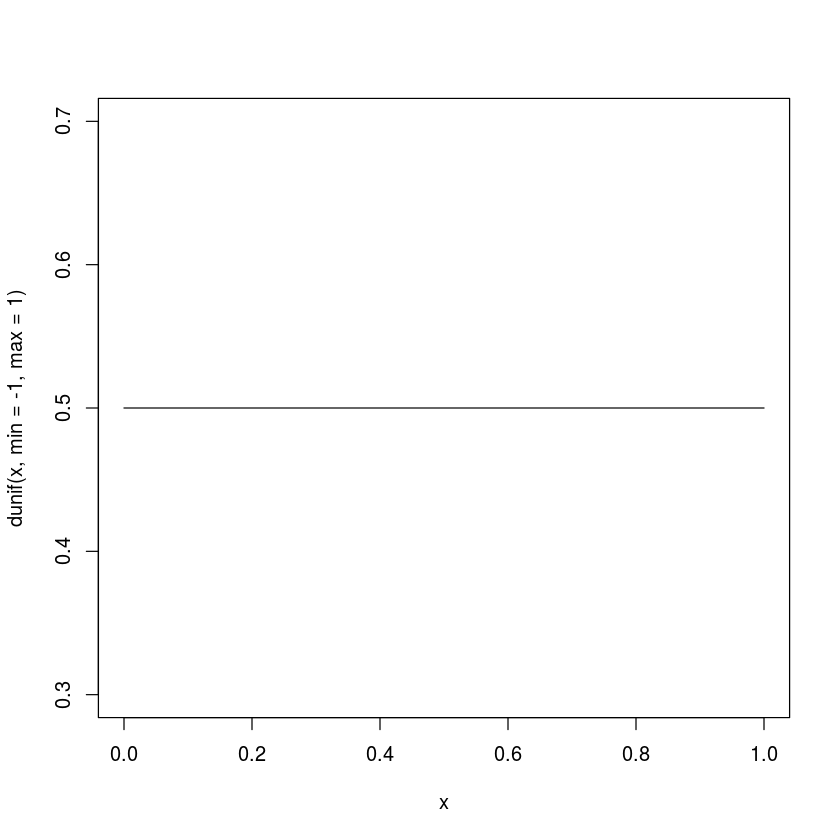

In [72]:
curve(dunif(x, min = -1, max = 1)) 

## (b)Generate 1000 independent sets of 800 independent uniform(-1, 1) r.v.s. {-}

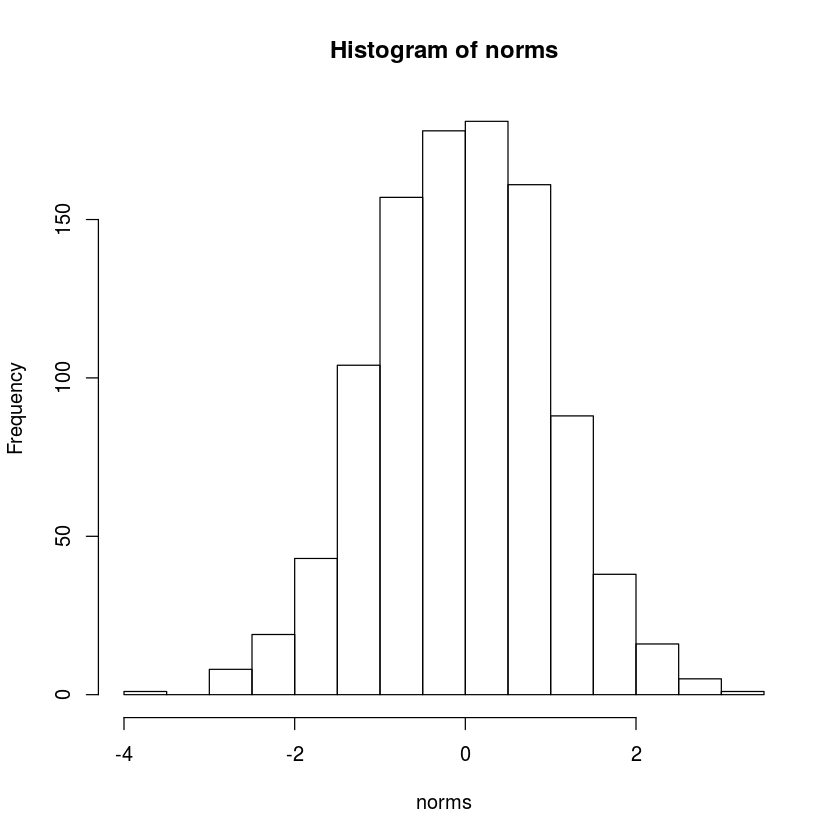

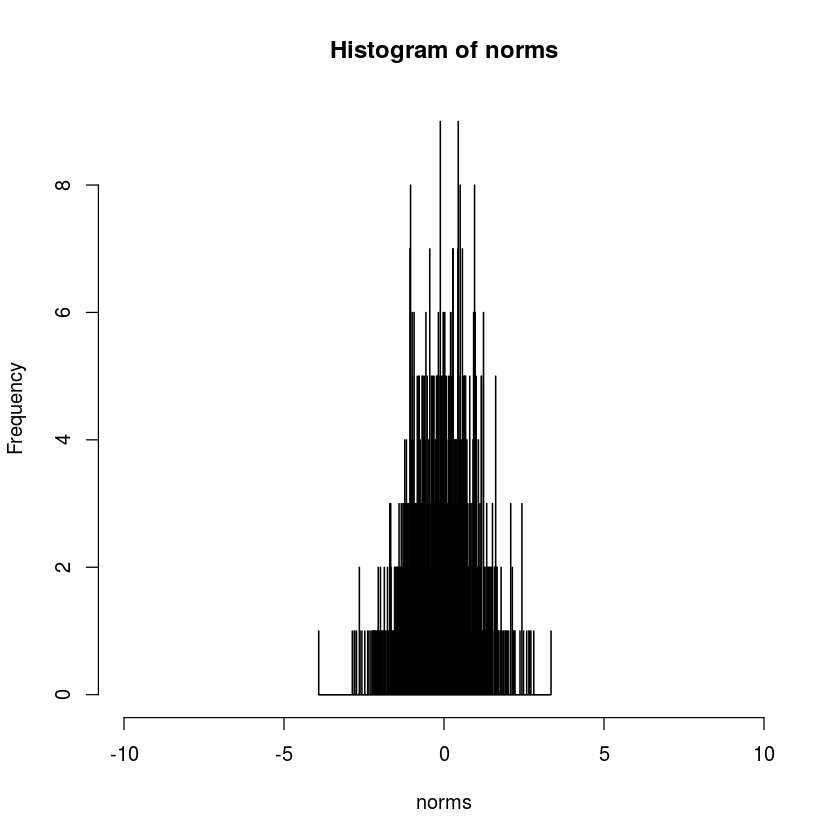

In [73]:
n = 800
m = 1000
u = runif(n * m, -1, 1)
dim(u) = c(n, m)
means = array(0, c(1, m))
sds = array(0, c(1, m))
norms = array(0, c(1, m))

for(i in 1:m){
    means[i] = mean(u[,i])
    sds[i] = sd(u[,i])
    norms[i] = means[i] * sqrt(n) / sds[i]
}

hist(norms) 

breaks = 1000
xlim = c(-10, 10)
hist(norms, breaks = 1000, xlim = c(-10, 10))

## (c) Do the histograms above look like ones from a standard normal distribution? {-}
I think the histograms I obtained in (b) looks like the histograms for a standard normal because its mean is close to 0 and its data are roughly spread out evenly for both sides of the mean.
   

## (d) Kolmogorov-Smirnov test {-}

In [74]:
ks.test(norms, pnorm)


	One-sample Kolmogorov-Smirnov test

data:  norms
D = 0.033878, p-value = 0.2012
alternative hypothesis: two-sided


If we let $a = 0.01$ then, since $p-value = 0.2427 > 0.01$, we fail to reject our null hypothesis, suggesting that there is strong evidence that our 1000 samples come from a standard normal distribution.

# 2. Gamma Distrubtion{-}
## (a) Plot the p.d.f of a gamma random variable with parameters $a = 0.01$ and $\lambda = 1$. {-}

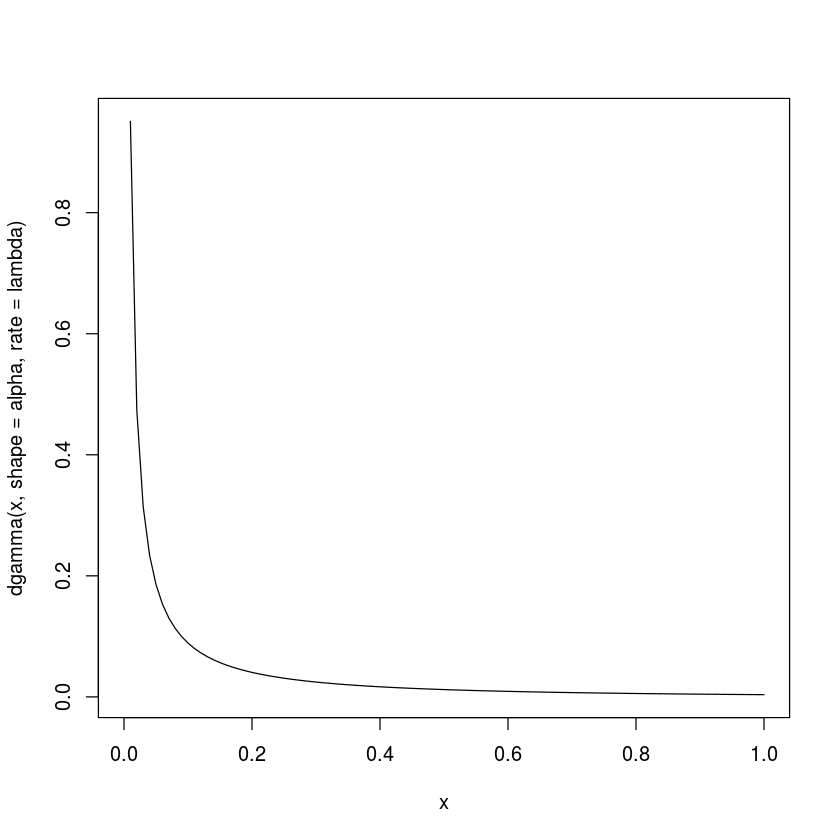

In [75]:
alpha = 0.01
lambda = 1
curve(dgamma(x, shape = alpha, rate = lambda)) 

## (b) Generate 1000 independent sets of 800 independent Gamma(0.01, 1) r.v.s. {-}

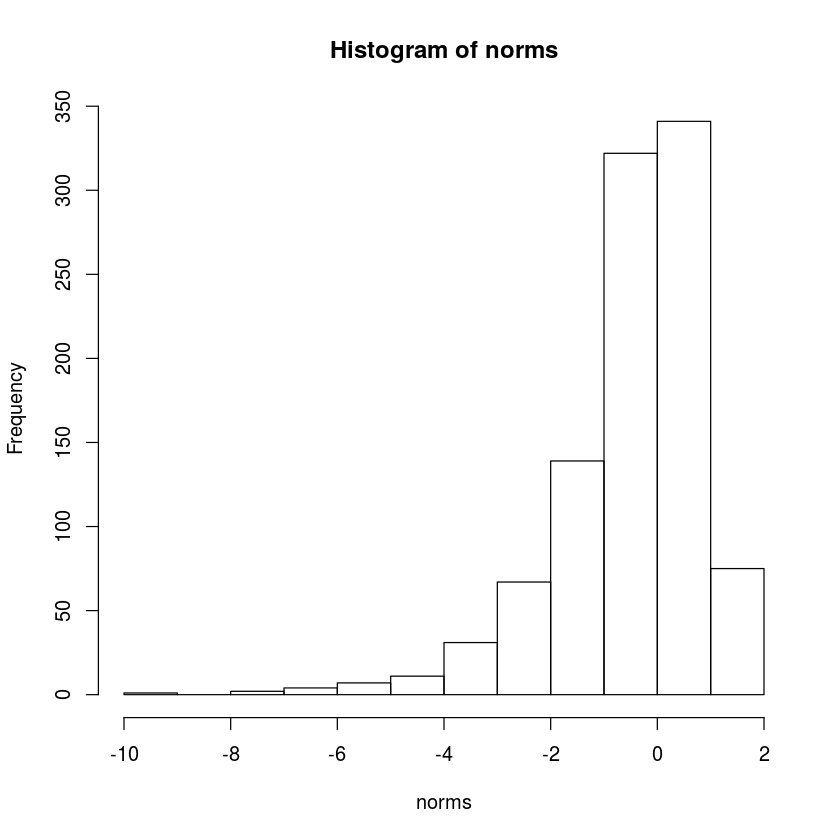

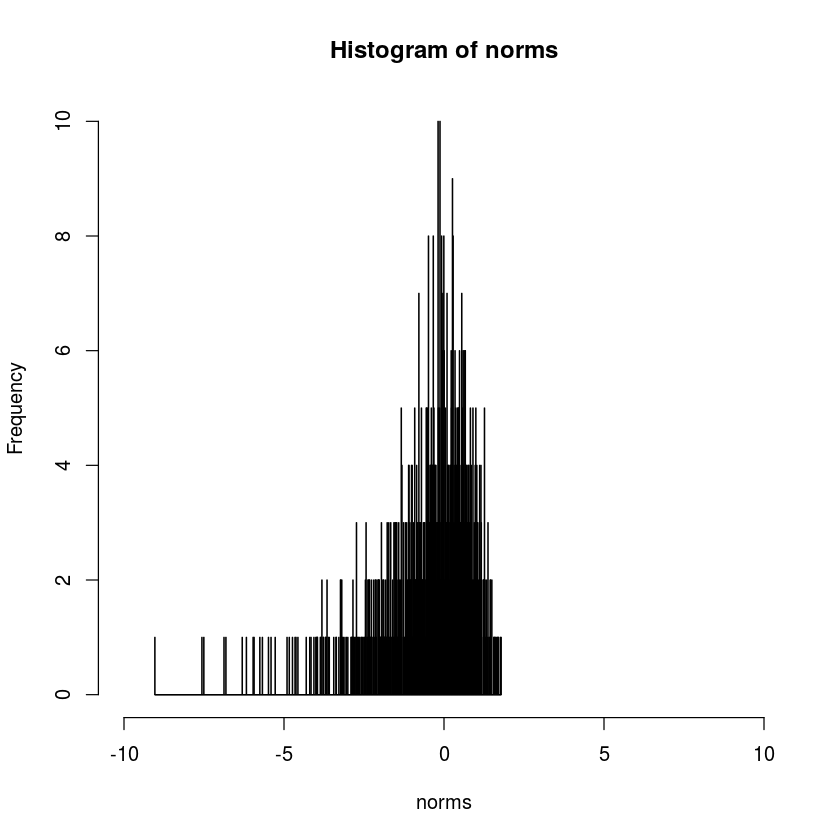

In [76]:
n = 800
m = 1000
g = rgamma(n * m, shape = alpha, rate = lambda)
true_mean = alpha/lambda

dim(g) = c(n, m)
means = array(0, c(1, m))
sds = array(0, c(1, m))
norms = array(0, c(1, m))

for(i in 1:m){
    means[i] = mean(g[,i])
    sds[i] = sd(g[,i])
    norms[i] = (means[i] - true_mean) * sqrt(n) / sds[i]
}

hist(norms) 

breaks = 1000
xlim = c(-10, 10)
hist(norms, breaks = 1000, xlim = c(-10, 10))

## (c) Do the histograms above look like ones from a standard normal distribution? {-}
It does look like a histogram from a normal distribution but not a standard normal distribution because the mean is not near 0 and that all data points are positive.

## (d) Kolmogorov-Smirnov test {-}

In [77]:
ks.test(norms, pnorm)


	One-sample Kolmogorov-Smirnov test

data:  norms
D = 0.12175, p-value = 2.671e-13
alternative hypothesis: two-sided


If we let $a = 0.01$ then, since $p-value = 2.2e-16 < 0.01$, we reject our null hypothesis, suggesting that we don't have enough evidence that our 1000 samples come from a standard normal distribution.

# 3. The Cauchy Distrubtion{-}
## (a) Plot the p.d.f of the Cauchy random variable. {-}

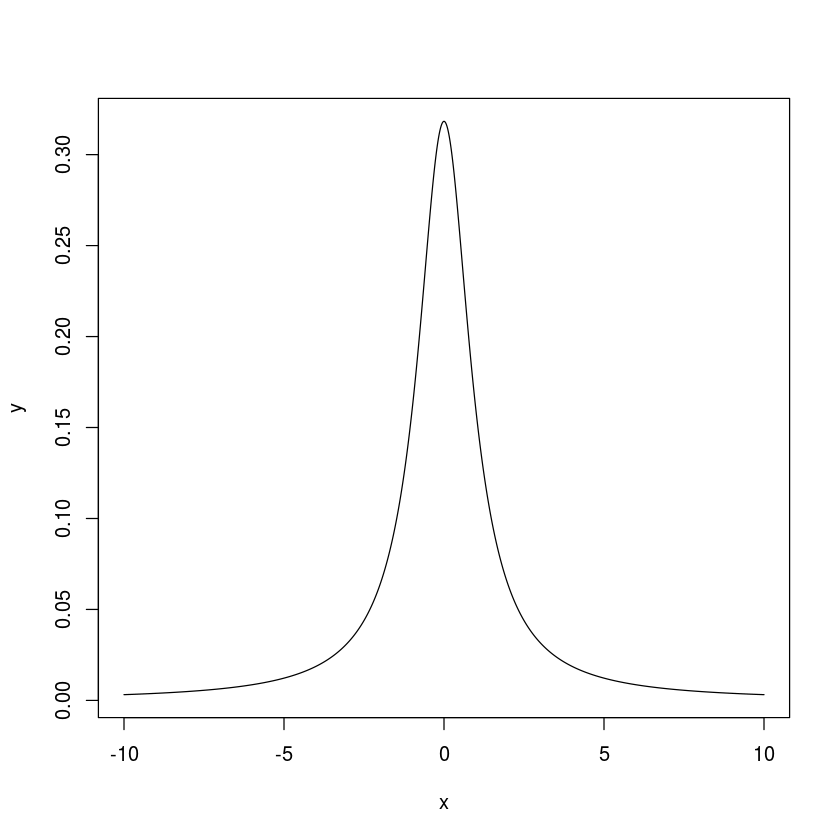

In [78]:
x = seq(-10, 10, 0.01)
y = dcauchy(x)
plot(x, y, type = 'l')

## (b) Generate 1000 independent sets of 800 independent Cauchy r.v.s. {-}

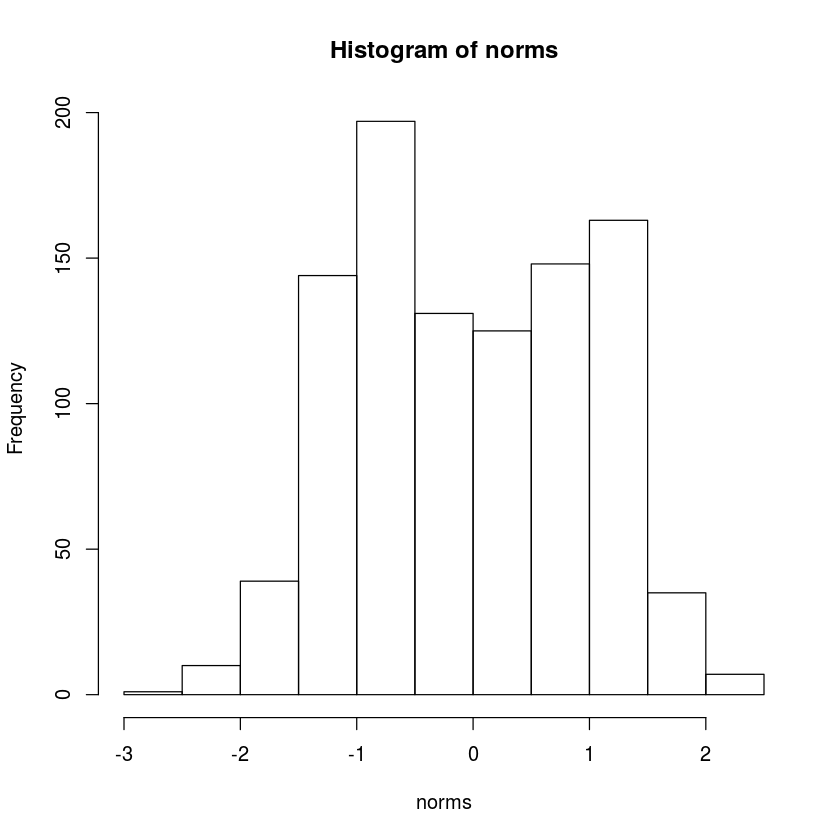

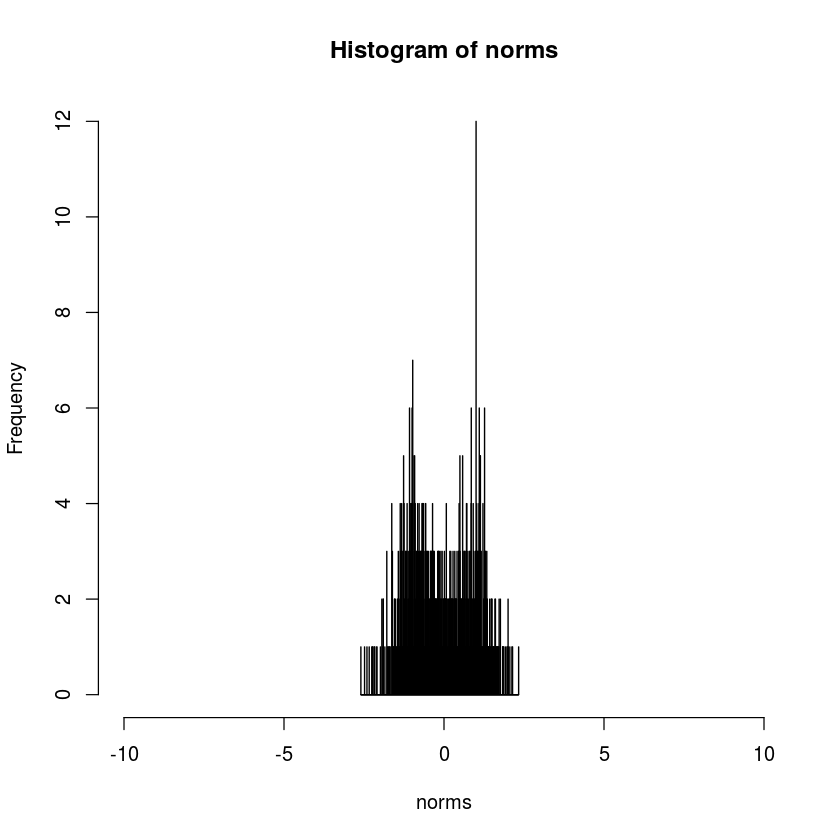

In [79]:
n = 800
m = 1000
C = rcauchy(n * m)
dim(C) = c(n, m)
means = array(0, c(1, m))
sds = array(0, c(1, m))
norms = array(0, c(1, m))

for(i in 1:m){
    means[i] = mean(C[,i])
    sds[i] = sd(C[,i])
    norms[i] = means[i] * sqrt(n) / sds[i]
}

hist(norms) 

breaks = 1000
xlim = c(-10, 10)
hist(norms, breaks = 1000, xlim = c(-10, 10))

## (c) Do the histograms above look like ones from a standard normal distribution? {-}
It does not look like a standard normal distribution because although the mean is near 0 data points and roughly symmetric about the mean, the band for the mean is wide.

## (d) Kolmogorov-Smirnov test {-}

In [80]:
ks.test(norms, pnorm)


	One-sample Kolmogorov-Smirnov test

data:  norms
D = 0.08904, p-value = 2.599e-07
alternative hypothesis: two-sided


If we let $a = 0.01$ then, since $p-value = 2.54e-07 < 0.01$, we reject our null hypothesis, suggesting that we don't have enough evidence that our 1000 samples come from a standard normal distribution.

# 4. Summary{-}
In the previous 3 parts, we've generated 1000 samples of $\frac{\bar{x} - \mu}{S/\sqrt{n}}$ where $\bar{x}$ was the sample means and $S$ was the sample standard deviations of 1000 uniform, gamma and cauchy random variables, respectively. Then, we conducted a Kolmogorov-Smirnov test to see if there is evidence that each set of 1000 samples of $\frac{\bar{x} - \mu}{S/\sqrt{n}}$ could come from the standard normal distribution.
<br/>
In the case of the uniform distribution, we concluded that there is evidence that its samples we generated could come from the standard normal distribution. In the case of the gamma distribution and the cauchy distribution, however, we concluded that there is not enough evidence that its samples we generated come form the standard normal distribution. 
<br/>
Therefore, we claim that the assumption of normality becomes crucial if the data actually comes from either the gamma or the cauchy distributions, suggesting that we cannot perform a t-test if we find that the data come from either of these distributions.